# Gradient Descent Optimization

## Table of contents:
* [Vanilla Gradient Descent](#vanilla)
* [Stochastic Gradient Descent](#sgd)
* [Minibatch Gradient Descent](#minibatch)
* [Momentum](#momentum)
* [Nesterov Momentum](#nag)
* [Adagrad](#nag)
* [RMS Prop](#rms)
* [Adam](#adam)

# Gradient descent methods

Training models is nothing but optimizing user-defined cost functions $L\big(\{\mathbf{x}\}_{i=1}^{N}, \{w\}_{i=1}^{N}, \mathbf{\theta}\big)$. The gradient descent methods aim to achieve it by efficiently rolling down the high-dimensional landscape of the cost function $L$. One of its advantages is that it employs only the first order derivative of the cost function with respect to the parameters as opposed to the Newton's method which requires the second order derivatives  more or less in the opposite direction of the gradient and with a step size determined by learning rate.

Thus, the method concerns:<br>
(1) in which direction to update <br>
(2) how large step to make for the update (often named $\alpha$)<br>

$$\begin{align}
\mathbf{\theta}_{t+1} \quad & = &\quad \mathbf{\theta}_{t} + learning\,rate * direction\\
direction \quad & = &\quad - gradient \qquad or \qquad some\,other\,chosen\,direction\\
learning\,rate \quad & = &\quad common\,to\,all\,the\,parameters \qquad or \qquad different\,for\,each\,parameter\\
samples\,taken\,into\,account \quad & = &\quad all \qquad or \qquad partial
\end{align}$$

Note that if one chooses a too-large learning rate, the next step might overshoot the valley, might reach the hill on the other side, and might even diverge by repeatedly bounching up the hills. Often, $learning\,rate = \alpha$ is annealed (shrunken) as the step progresses. 


# Non-linear logistic regression recap

We choose the negative loglikelihood as the logistic cost function (added a regularization term, which is a gaussian prior with std of $\sigma_{p}$), which is parametrized with a set of parameters $\mathbf{\theta}$.

$$\begin{align}
L\big(\{\mathbf{x}\}_{i=1}^{N}, \{w\}_{i=1}^{N}, \mathbf{\theta}\big) \quad & = &\quad -log \bigg[Bern_{w}(\mathbf{a}) \bigg]
 \quad & = &\quad -\sum_{i}^{N} \bigg[ w_{i}log\big(sig\big[\mathbf{\phi}^{T}\mathbf{z}_{i}\big]\big) + (1 - w_{i})log \big(1 - sig\big[\mathbf{\phi}^{T}\mathbf{z}_{i}\big] \big) \bigg] + \frac{\mathbf{\theta}^{T}\mathbf{\theta} }{2\sigma_{p}^{2}}
\end{align}$$

, where $\mathbf{z}$ forms non-linear bases.

$$\begin{align}
sig\big[\mathbf{\phi}^{T}\mathbf{z}_{i}\big] \quad & = &\quad  \frac{1}{1 + exp(-\mathbf{\phi}^{T}\mathbf{z}_{i})}\\
\mathbf{z}_{i} \quad & = &\quad \big[1, f_{1}(\mathbf{x}_{i}), \cdots, f_{K}(\mathbf{x}_{i})\big]^{T}\\
\mathbf{\phi} \quad & = &\quad \big[\phi_{0},\mathbf{\phi}^{T} \big]^{T}\\
\end{align}$$

Here, as an example, we take the radial basis function.
$$\begin{align}
f_{k}(\mathbf{x}) \quad & = &\quad exp\bigg(-\frac{(\mathbf{x} - \alpha_{k})^{T}(\mathbf{x} - \alpha_{k})}{2\lambda}\bigg)
\end{align}$$


Let us concatenate all the parameters.

$$\begin{align}
\mathbf{\theta} \quad & = &\quad \big[\mathbf{\phi}^{T}, \mathbf{\alpha}_{1}^{T}, \cdots,  \mathbf{\alpha}_{K}^{T} \big]^{T}
\quad & = &\quad \big[\phi_{0}, \phi_{1}, \cdots, \phi_{K}, \alpha_{1, 1}, \cdots, \alpha_{D, 1}, \cdots, \alpha_{1, K}, \cdots, \alpha_{D, K} \big] \quad \Rightarrow \quad _{(K+1 + KD) \times 1}\\
\end{align}$$

In order to minimize the cost function, we employ gradient descents which requires first order derivative of the cost function with respect to the parameters.

$$\begin{align}
\frac{\partial L(\mathbf{\theta})}{\partial\theta_{j}} \quad & = &\quad - \sum_{i}^{N} ( w_{i} - sig[a_{i}]) \frac{\partial a_{i}}{\partial\theta_{j}}
\end{align}$$

When $z_{k} = gaussian[\mathbf{\alpha}_{k}^{T}\mathbf{x}, \lambda]$,

$$\begin{align}
a_{i} \quad & = &\quad \phi_{0} + \sum_{k=1}^{K} \phi_{k} exp\bigg(-\frac{1}{\lambda}\sum_{d=1}^{D} ({x}_{i, d} - \alpha_{d, k})^{2}\bigg)
\end{align}$$

The gradients are

$$\begin{align}
\frac{\partial a_{i}}{\partial\theta_{\phi}} \quad & \Rightarrow &\quad \frac{\partial a_{i}}{\partial\phi_{k}} \quad & = & \quad \frac{\partial \phi_{k}}{\partial\phi_{k}} z_{i, k} \quad & = & \quad z_{i,k} \quad \Rightarrow \quad _{(K+1) \times N} \\
\frac{\partial a_{i}}{\partial\theta_{\alpha}} \quad & \Rightarrow & \quad \frac{\partial a_{i}}{\partial\mathbf{\alpha}_{dk}} \quad & = & \quad \phi_{k} \frac{\partial z_{i, k}}{\partial\alpha_{dk}} \quad & = & \quad \phi_{k}\bigg[ \frac{z_{i, k}}{\lambda}(x_{i,d} - \alpha_{dk})\bigg] \quad \Rightarrow \quad _{DK \times N}
\end{align}$$

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst
%matplotlib inline

#from non_linear_logistic_regression_common import *
# usual gangs

In [113]:
class DataSet:
    def __init__(self):
        pass
        
    def generate_data_set_dim2_nonlinear(self, ns):
        """
        this function generates a 2d data set of two classes which are linearly separated.

        Arguments:
            ns: number of samples

        Output:
            ds1: data on the negative side (3, ns). ds1[1] = 0 is the label.
            ds2: data on the positive side (3, ns). ds2[1] = 0 is the label.
            data  : data combined ds1 and ds2 and shuffled. (2, ns)
            label : label combined ds1 and ds2 and shuffled. (2, ns)
        """
        ns_neg = int(0.5 * ns)
        ns_pos = ns - ns_neg

        ang1 = np.linspace(0, 3*np.pi, ns_neg)
        rad1 = ang1 + 0.05
        ang1 += 0.4 * np.pi * (np.random.rand(ns_neg) - 0.5)
        ds1x = rad1 * np.cos(ang1)
        ds1y = rad1 * np.sin(ang1)
        ds1 = np.vstack((ds1x, ds1y))

        ang2 = np.linspace(0, 3*np.pi, ns_neg)
        rad2 = ang2 + 0.05
        ang2 += 0.4 * np.pi * (np.random.rand(ns_neg) - 0.5)+ np.pi
        ds2x = rad2 * np.cos(ang2)
        ds2y = rad2 * np.sin(ang2)
        ds2 = np.vstack((ds2x, ds2y))

        ds1s = np.vstack((ds1, np.zeros(ns_neg)))
        ds2s = np.vstack((ds2, np.ones(ns_pos)))
        ds = np.hstack((ds1s, ds2s))
        np.random.shuffle(ds.T)

        data = ds[:2]
        label = ds[2][np.newaxis, :]

        datas, mu, sg = self.scale_coordinates(data)
        ds1s = (ds1[:2] - mu)/sg
        ds2s = (ds2[:2] - mu)/sg

        plt.plot(ds1s[0], ds1s[1], 'r.', markersize=3)
        plt.plot(ds2s[0], ds2s[1], 'b.', markersize=3)
        plt.xlim((-3, 3))
        plt.ylim((-3, 3))
        return ds1s, ds2s, datas, label

    def scale_coordinates(self, x):
        mu = x.mean(keepdims=1)
        sg = x.std()
        xs = (x - mu)/sg
        return xs, mu, sg



In [167]:
class NonLinearLogisticRegression:
    def __init__(self, x, w, phi, alp, lmd):
        self.N = x.shape[1]
        self.D = x.shape[0]
        self.K = alp.shape[1]
        self.D1 = self.D + 1
        self.K1 = self.K + 1
        self.K1KD = self.K1 + self.K * self.D
        self.x = x
        self.w = w
        self.lmd = lmd
        
        assert x.shape[0] == alp.shape[0]
        assert x.shape[1] == w.shape[1]
        assert alp.shape[1] + 1 == phi.shape[1]
        assert phi.shape[0] == 1

    def cost_function(self, phi, alp):
        """
        this function computes logistic cost function

        Arguments:
            phi :  (1, K + 1)
        
        Intermediates:
            z   :  (K + 1, N)  1 is for bias.
            w   :  (1, N)
            sig :  (N, 1)

        Output:
            L:     scalar. cost function.
        """
        z = self.radial_basis(self.x, alp)
        sig = self.sigmoid(z, phi)
        L  = -np.dot(self.w, np.log(sig))
        L += -np.dot(1 - self.w, np.log(1 - sig))
        return L

    def sigmoid(self, z, phi):
        """
        this function computes sigmoid function

        Arguments:
            z   :  (K + 1, N)  1 is for bias.
            phi :  (1, K + 1)

        Intermediates:
            phix :  (1, N)
         
        Output:
            sig  :  (N, 1)
        """
        assert phi.shape[0] == 1
        assert phi.shape[1] == self.K1
        phix = np.dot(phi, z)
        phix[phix > 200] = 200
        phix[phix < -200] = -200
        sig = 1 / (1 + np.exp(-phix))
        return sig.T

    def radial_basis(self, xx, alp):
        """
        this function computes radial basis function.

        Arguments:
            xx   :   (D, nx)
            alp  :   (D, K)
            
        Output:
            bases:   (K + 1, nx)
        """
        assert alp.shape[0] == self.D
        assert xx.shape[0] == self.D
        assert alp.shape[1] == self.K
        bases = np.ones((self.K1, xx.shape[1]))
        for k in range(1, self.K1):
            bases[k, :] = spst.multivariate_normal.pdf(xx.T, alp[:, k-1], self.lmd * np.eye(self.D))
        return bases

    def dRB_dalp(self, z, alp, num):
        """
        this function computes dRB/dalp.

        Arguments:
            z      :   (K + 1, N)
            alp    :   (D, K)

        Intermediates:
            alpx   :   (K * D, N). alp extended.
            zx     :   (K * D, N). z extended.
            lmd    :   scalar. variance of RBF.

        Output:
            dzdalp :   (K * D, N)
        """
        assert alp.shape[0] == self.D
        assert alp.shape[1] == self.K
        assert z.shape[0] == self.K1
        alpx = np.reshape(alp.T, (self.K * self.D, 1))
        zx = np.kron(z[1:], np.ones((self.D, 1)))
        if num is not None:
            xx = np.tile(self.x[:, num], (self.K, 1))
        else:
            xx = np.tile(self.x, (self.K, 1))
        dzdalp = (xx - alpx) * zx / self.lmd
        return dzdalp

    def dz_dalp(self, z, alp, num):
        """
        this function returns dz/dalp.

        Arguments:
            z      :   (K + 1, N)
            alp    :   (D, K)

        Output:
            dzdalp :   (K * D, N)
        """
        return self.dRB_dalp(z, alp, num)

    def da_dphi(self, z):
        """
        this function computes da/dphi.

        Arguments:
            z: generated bases including bias at the zeroth row. ((K+1), N).

        Output:
            z: da/dphi. ((K+1), N)
        """
        return z

    def da_dalp(self, z, phi, alp, num):
        """
        this function generates da/dalp.

        Arguments:
            z  : generated bases including bias at the zeroth row. ((K+1), N).
            phi: phi. (1, (K+1))
            alp: alpha. (D, K)

        Intermediate:
            lmd   : scalar.
            x     : (D, N).     original cooridnates of the samples.
            phit  : (1, K).     phi_trancated. without bias.
            phix  : (1, K * D). phi_extended.
            dzda  : (K * D, N). dzdalp. 
            xx    : (K * D, N)
            alpx  : (K * D, 1)

        Output:
            da/dalp: (K*D, N)
        """
        assert alp.shape[0] == self.D
        assert alp.shape[1] == self.K
        assert z.shape[0] == self.K1
        assert phi.shape[0] == 1
        assert phi.shape[1] == self.K1
        phit = phi[:, 1:]
        dzda = self.dz_dalp(z, alp, num)
        phix = np.kron(phit, np.ones((1, self.D)))
        dadalp = phix.T * dzda
        return dadalp

    def da_dtheta(self, z, phi, alp, num):
        """
        this function generates da/dtheta.

        Arguments:
            z  : generated bases including bias at the zeroth row. ((K+1) * N).
            x  : original cooridnates of the samples. (D, N)
            phi: phi. (1, (K+1))
            alp: alpha. (D, K)
            lmd: scalar.

        Output:
            da/dtheta: ((K+1+KD), N)
        """
        dadt = np.zeros((self.K1KD, z.shape[1]))
        dadt[:self.K1, :] = self.da_dphi(z)
        dadt[self.K1:, :] = self.da_dalp(z, phi, alp, num)
        return dadt

    def dL_dtheta(self, phi, alp, num=None):
        """
        this function generates dda/dphidalp.

        Arguments:
            z  : generated bases including bias at the zeroth row. ((K+1) * N).
            x  : original cooridnates of the samples. (D, N)
            w  : label. (1, N)
            phi: phi. (1, (K+1))
            alp: alpha. (D, K)
            lmd: scalar.

        Intermediate:
            sig   : (N, 1)
            dadt  : ((K+1+KD), N)
            dlt   : (1, N)

        Output:
            dLdt: ((K+1+KD), 1)
        """
        if num is None:
            z = self.radial_basis(self.x, alp)
        elif num.shape[0] == 1:
            z = self.radial_basis(self.x[:, num][:, np.newaxis], alp)
        else:
            z = self.radial_basis(self.x[:, num], alp)
        dadt = self.da_dtheta(z, phi, alp, num)
        sig = self.sigmoid(z, phi)
        if num is None:
            dLdt = -np.dot(dadt, w.T - sig)
        elif num.shape[0] == 1:
            dLdt = -np.dot(dadt, w[:, num].T - sig)
        else:
            dLdt = -np.dot(dadt, w[:, num].T - sig)
        return dLdt
    
    def plot_decision_boundary_dim2(self, phi, alp):
        """
        this function computes sigmoid function

        Arguments:
            phi  : phi. (1, (K+1))
            alp  : alpha. (D, K)
            beta : scalar. learning rate.
            lmd  : scalar.

        Intermediate:
            dLdt   : ((K+1+KD), 1)
            ddLdtdt: ((K+1+KD), (K+1+KD))

        Output:
            theta: (1, (K+1+KD))
        """
        n = 201
        nn = n**2
        x = np.linspace(-3, 3, n)
        y = np.linspace(-3, 3, n)
        xg, yg = np.meshgrid(x, y)
        xss = xg.reshape(1, nn)
        yss = yg.reshape(1, nn)
        xys = np.vstack((xss, yss))
        z = self.radial_basis(xys, alp)
        bd = self.sigmoid(z, phi).reshape(n, n)
        bd = np.flipud(bd)
        plt.imshow(bd, extent=[-3, 3, -3, 3])
        return bd
    

In [222]:
class GradientDescent:
    def __init__(self, x, w, phi, alp, lmd, sgps, nstep, beta, method):
        self.N = x.shape[1]
        self.D = x.shape[0]
        self.K = alp.shape[1]
        self.D1 = self.D + 1
        self.K1 = self.K + 1
        self.K1KD = self.K1 + self.K * self.D
        self.lmd = lmd
        self.sgps = sgps
        self.nstep = nstep
        self.beta = beta
        self.method = method
        self.x = x
        self.w = w
        self.phi_init = phi
        self.alp_init = alp
        self.nllr = NonLinearLogisticRegression(x, w, phi, alp, lmd)
        
        assert x.shape[0] == alp.shape[0]
        assert x.shape[1] == w.shape[1]
        assert alp.shape[1] + 1 == phi.shape[1]
        assert phi.shape[0] == 1

    def optimization_method(self, phi, alp, method):
        if method == "vanilla":
            params = {'phi': phi, 'alp': alp}
            return self.vanilla, params
        elif method == "stochastic":
            params = {'phi': phi, 'alp': alp}
            return self.stochastic, params
        elif method == "minibatch":
            params = {'phi': phi, 'alp': alp}
            return self.minibatch, params
        elif method == "momentum":
            v = np.zeros((1, self.K1KD))
            params = {'phi': phi, 'alp': alp, 'v': v}
            return self.momentum, params
        elif method == "nesterov":
            v = np.zeros((1, self.K1KD))
            params = {'phi': phi, 'alp': alp, 'v': v}
            return self.nesterov, params
        elif method == "adagrad":
            grad_sum = np.zeros((1, self.K1KD))
            params = {'phi': phi, 'alp': alp, 'grad_sum': grad_sum}
            return self.adagrad, params
        elif method == "rmsprop":
            v = np.zeros((1, self.K1KD))
            grad_sum = np.zeros((1, self.K1KD))
            params = {'phi': phi, 'alp': alp, 'v': v, 'grad_sum': grad_sum}
            return self.rmsprop, params
        elif method == "adam":
            v = np.zeros((1, self.K1KD))
            grad_sum = np.zeros((1, self.K1KD))
            params = {'phi': phi, 'alp': alp, 'v': v, 'grad_sum': grad_sum}
            return self.adam, params
        else:
            raise KeyError("the method given does not exist.")

    def optimization(self, phi, alp):
        """
        this function performs the gradient descent.

        Arguments:
            z    : generated bases including bias at the zeroth row. ((K+1), N).
            x    : original cooridnates of the samples. (D, N)
            phi  : phi. (1, (K+1))
            alp  : alpha. (D, K)
            beta : scalar. learning rate.
            lmd  : scalar.

        Output:
            theta: (1, (K+1+KD))
        """
        dlt = 1
        step = 0
        alps = np.zeros((self.nstep, self.D, self.K))
        alps[step] = alp
        costs = np.zeros(self.nstep)
        costs[step] = self.nllr.cost_function(phi, alp)
        update_params, params = self.optimization_method(phi, alp, self.method)
        while dlt > 0.000001:
            step += 1
            if step == self.nstep:
                break
            params = update_params(params, step)
            costs[step] = self.nllr.cost_function(params['phi'], params['alp']) 
            alps[step, :, :] = params['alp']
            dlt = np.abs(costs[step] - costs[step - 1])
        self.param_description(step, params)
        return params, costs[:step + 1], alps[:step + 1, :, :]

    def param_description(self, step, params):
        strng = '{:d} steps done. '.format(step)
        strng += 'beta = '
        for bt in self.beta:
            strng += '{:1.3f}, '.format(self.beta[bt]) 
        strng += '. lambda = {:1.3f}'.format(self.lmd)
        strng += '. prior std**2 = {:1.2f}'.format(self.sgps)
        #strng += '\nphi = \n'
        #for k in range(self.K1):
        #    strng += '{:1.4f}, '.format(params['phi'][0, k])
        #strng += '\nalp = '
        #for d in range(self.D):
        #    strng += '\n'
        #    for k in range(self.K):
        #        strng += '{:1.4f}, '.format(params['alp'][d, k])
        #strng += '\n'
        print(strng)

    def plot_output(self, row, ax, ds, params, costs, alps):
        plt.subplot(row, 3, ax)
        self.nllr.plot_decision_boundary_dim2(params['phi'], params['alp'])
        plt.scatter(ds['1'][0], ds['1'][1], c=(1., 0., 0.), s=3)
        plt.scatter(ds['2'][0], ds['2'][1], c=(0., 0., 1.), s=3)
        plt.scatter(self.alp_init[0], self.alp_init[1], s=50, c=(0.0, 0.8, 0.0), marker='+')
        plt.scatter(params['alp'][0], params['alp'][1], s=80, c=(1.0, 0.0, 1.0), marker='x')
        plt.xlim((-3, 3))
        plt.ylim((-3, 3))
        strng = ''
        for bt in self.beta:
            strng += '{} = {:1.3f}, '.format(bt, self.beta[bt]) 
        plt.title(strng)

        plt.subplot(row, 3, ax + 1)
        for k in range(alps.shape[2]):
            plt.plot(alps[:, 0, k], alps[:, 1, k], '-',
                     lw = 0.2, color=(0.0, 0.8, 0.0))
        initi = plt.scatter(self.alp_init[0], self.alp_init[1],
                            s=50, c=(0.0, 0.8, 0.0), marker='+')
        final = plt.scatter(params['alp'][0], params['alp'][1],
                            s=80, c=(1.0, 0.0, 1.0), marker='x')
        plt.legend([initi, final], ["initial", " final"])
        plt.xlim((-3, 3))
        plt.ylim((-3, 3))

        plt.subplot(row, 3, ax + 2)
        plt.plot(costs, '.')
        plt.xlabel('number of iterations')
        plt.ylabel('cost')
        plt.xlim((-50, self.nstep + 50))
        
    def vanilla(self, params, step):
        """
        this function computes sigmoid function

        Arguments:
            params : 

        Intermediate:
            dLdt : ((K+1+KD), 1)
            z    : generated bases including bias at the zeroth row. ((K+1) * N).
            x    : original cooridnates of the samples. (D, N)
            phi  : phi. (1, (K+1))
            alp  : alpha. (D, K)
            beta : scalar. learning rate.
            lmd  : scalar.

        Output:
            params :
        """
        theta = np.hstack((params['phi'], params['alp'].T.reshape(1, self.K * self.D)))
        dLdt  = self.nllr.dL_dtheta(params['phi'], params['alp']).T
        theta += -self.beta['beta0'] * dLdt
        theta += -theta / self.sgps
        params['phi'] = theta[0, :self.K1].reshape(1, self.K1)
        params['alp'] = theta[0, self.K1:].reshape(self.K, self.D).T
        return params

    def stochastic(self, params, step):
        """
        this function computes sigmoid function

        Arguments:
            params : 

        Intermediate:
            dLdt : ((K+1+KD), 1)
            z    : generated bases including bias at the zeroth row. ((K+1) * N).
            x    : original cooridnates of the samples. (D, N)
            phi  : phi. (1, (K+1))
            alp  : alpha. (D, K)
            beta : scalar. learning rate.
            lmd  : scalar.

        Output:
            params :
        """
        theta = np.hstack((params['phi'], params['alp'].T.reshape(1, self.K * self.D)))
        n = 1
        num = np.random.choice(self.N, n, replace=False)
        dLdt  = self.nllr.dL_dtheta(params['phi'], params['alp'], num).T
        theta += -self.beta['beta0'] * dLdt
        theta += -theta / self.sgps
        params['phi'] = theta[0, :self.K1].reshape(1, self.K1)
        params['alp'] = theta[0, self.K1:].reshape(self.K, self.D).T
        return params

    def minibatch(self, params, step):
        """
        this function computes sigmoid function

        Arguments:
            params : 

        Intermediate:
            dLdt : ((K+1+KD), 1)
            z    : generated bases including bias at the zeroth row. ((K+1) * N).
            x    : original cooridnates of the samples. (D, N)
            phi  : phi. (1, (K+1))
            alp  : alpha. (D, K)
            beta : scalar. learning rate.
            lmd  : scalar.

        Output:
            params :
        """
        theta = np.hstack((params['phi'], params['alp'].T.reshape(1, self.K * self.D)))
        n = 50
        num = np.random.choice(self.N, n, replace=False)
        dLdt  = self.nllr.dL_dtheta(params['phi'], params['alp'], num).T
        theta += -self.beta['beta0'] * dLdt
        theta += -theta / self.sgps
        params['phi'] = theta[0, :self.K1].reshape(1, self.K1)
        params['alp'] = theta[0, self.K1:].reshape(self.K, self.D).T
        return params

    def momentum(self, params, step):
        """
        this function computes sigmoid function

        Arguments:
            params : 

        Intermediate:
            dLdt : ((K+1+KD), 1)
            z    : generated bases including bias at the zeroth row. ((K+1) * N).
            x    : original cooridnates of the samples. (D, N)
            phi  : phi. (1, (K+1))
            alp  : alpha. (D, K)
            beta : scalar. learning rate.
            lmd  : scalar.

        Output:
            params :
        """
        theta = np.hstack((params['phi'], params['alp'].T.reshape(1, self.K * self.D)))
        dLdt  = self.nllr.dL_dtheta(params['phi'], params['alp']).T
        params['v'] = self.beta['beta1'] * params['v']
        params['v'] += -self.beta['beta0'] * dLdt
        theta += params['v']
        theta += -theta / self.sgps
        params['phi'] = theta[0, :self.K1].reshape(1, self.K1)
        params['alp'] = theta[0, self.K1:].reshape(self.K, self.D).T
        return params

    def nesterov(self, params, step):
        """
        this function computes sigmoid function

        Arguments:
            params : 

        Intermediate:
            dLdt : ((K+1+KD), 1)
            z    : generated bases including bias at the zeroth row. ((K+1) * N).
            x    : original cooridnates of the samples. (D, N)
            phi  : phi. (1, (K+1))
            alp  : alpha. (D, K)
            beta : scalar. learning rate.
            lmd  : scalar.

        Output:
            params :
        """
        theta = np.hstack((params['phi'], params['alp'].T.reshape(1, self.K * self.D)))
        dLdt  = self.nllr.dL_dtheta(params['phi'], params['alp']).T
        v_prev = params['v']
        params['v'] = self.beta['beta1'] * params['v']
        params['v'] += -self.beta['beta0'] * dLdt
        theta += -self.beta['beta1'] * v_prev
        theta += (1 + self.beta['beta1']) * params['v']
        theta += - theta / self.sgps
        params['phi'] = theta[0, :self.K1].reshape(1, self.K1)
        params['alp'] = theta[0, self.K1:].reshape(self.K, self.D).T
        return params
    
    def adagrad(self, params, step):
        """
        this function computes sigmoid function

        Arguments:
            params : 

        Intermediate:
            dLdt : ((K+1+KD), 1)
            z    : generated bases including bias at the zeroth row. ((K+1) * N).
            x    : original cooridnates of the samples. (D, N)
            phi  : phi. (1, (K+1))
            alp  : alpha. (D, K)
            beta : scalar. learning rate.
            lmd  : scalar.

        Output:
            params :
        """
        theta = np.hstack((params['phi'], params['alp'].T.reshape(1, self.K * self.D)))
        dLdt  = self.nllr.dL_dtheta(params['phi'], params['alp']).T
        params['grad_sum'] += dLdt ** 2 
        denom = np.sqrt(params['grad_sum']) + 1e-8
        theta += -self.beta['beta0'] * dLdt / denom
        theta += -theta / self.sgps
        params['phi'] = theta[0, :self.K1].reshape(1, self.K1)
        params['alp'] = theta[0, self.K1:].reshape(self.K, self.D).T
        return params
 
    def rmsprop(self, params, step):
        """
        this function computes sigmoid function

        Arguments:
            params : 

        Intermediate:
            dLdt : ((K+1+KD), 1)
            z    : generated bases including bias at the zeroth row. ((K+1) * N).
            x    : original cooridnates of the samples. (D, N)
            phi  : phi. (1, (K+1))
            alp  : alpha. (D, K)
            beta : scalar. learning rate.
            lmd  : scalar.

        Output:
            params :
        """
        theta = np.hstack((params['phi'], params['alp'].T.reshape(1, self.K * self.D)))
        dLdt  = self.nllr.dL_dtheta(params['phi'], params['alp']).T
        params['grad_sum'] = self.beta['beta2'] * params['grad_sum']
        params['grad_sum'] += (1 - self.beta['beta2']) * dLdt ** 2 
        denom = np.sqrt(params['grad_sum']) + 1e-6
        theta += -self.beta['beta0'] * dLdt / denom
        theta += -theta / self.sgps
        params['phi'] = theta[0, :self.K1].reshape(1, self.K1)
        params['alp'] = theta[0, self.K1:].reshape(self.K, self.D).T
        return params

    def adam(self, params, step):
        """
        this function computes sigmoid function

        Arguments:
            params : 

        Intermediate:
            dLdt : ((K+1+KD), 1)
            z    : generated bases including bias at the zeroth row. ((K+1) * N).
            x    : original cooridnates of the samples. (D, N)
            phi  : phi. (1, (K+1))
            alp  : alpha. (D, K)
            beta : scalar. learning rate.
            lmd  : scalar.

        Output:
            params :
        """
        theta = np.hstack((params['phi'], params['alp'].T.reshape(1, self.K * self.D)))
        dLdt  = self.nllr.dL_dtheta(params['phi'], params['alp']).T
        params['v'] = self.beta['beta1'] * params['v']
        params['v'] += (1 - self.beta['beta1']) * dLdt
        v_num = params['v'] / (1 - self.beta['beta1'] ** step)
        params['grad_sum'] = self.beta['beta2'] * params['grad_sum']
        params['grad_sum'] += (1 - self.beta['beta2']) * dLdt ** 2 
        gs = params['grad_sum'] / (1 - self.beta['beta2'] ** step)
        denom = (np.sqrt(gs) + 1e-8) 
        theta += -self.beta['beta0'] * v_num / denom 
        theta += - theta / sgps
        params['phi'] = theta[0, :self.K1].reshape(1, self.K1)
        params['alp'] = theta[0, self.K1:].reshape(self.K, self.D).T
        return params


# Generate Data Set

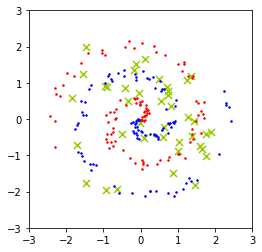

In [224]:
D = 2
K = 40
N = 200
data = DataSet()
alp = 2 * 2 * (np.random.rand(D, K) - 0.5)
phi = 2 * 2 * (np.random.rand(1, K + 1) - 0.5)

plt.rcParams['figure.figsize'] = (4.0, 4.0)
ds1, ds2, x, w = data.generate_data_set_dim2_nonlinear(N)
ds = {'1': ds1, '2': ds2}
plt.scatter(alp[0], alp[1], s=50, c=(0.6, 0.8, 0.), marker='x')

# Vanilla gradient descent

This is one of the simplest kind. Namely, given the gradient, updates are done exactly the opposite direction.

$$\begin{align}
direction \quad & = &\quad - gradient \\
learning\,rate \quad & = &\quad common\,to\,all\,the\,parameters\\
samples\,taken\,into\,account \quad & = &\quad all
\end{align}$$

The update form is as follows.
 
$$\begin{align}
\mathbf{\theta}_{t+1} \quad & = &\quad \mathbf{\theta}_{t} - \alpha \frac{\partial}{\partial \mathbf{\theta}}L\big(\{\mathbf{x}\}_{i=1}^{N}, \{w\}_{i=1}^{N}, \mathbf{\theta}\big)
\end{align}$$

Often, $\alpha$ is annealed as the step progresses. 

500 steps done. beta = 0.001, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.005, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.025, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.125, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.625, . lambda = 0.100. prior std**2 = 2000.00


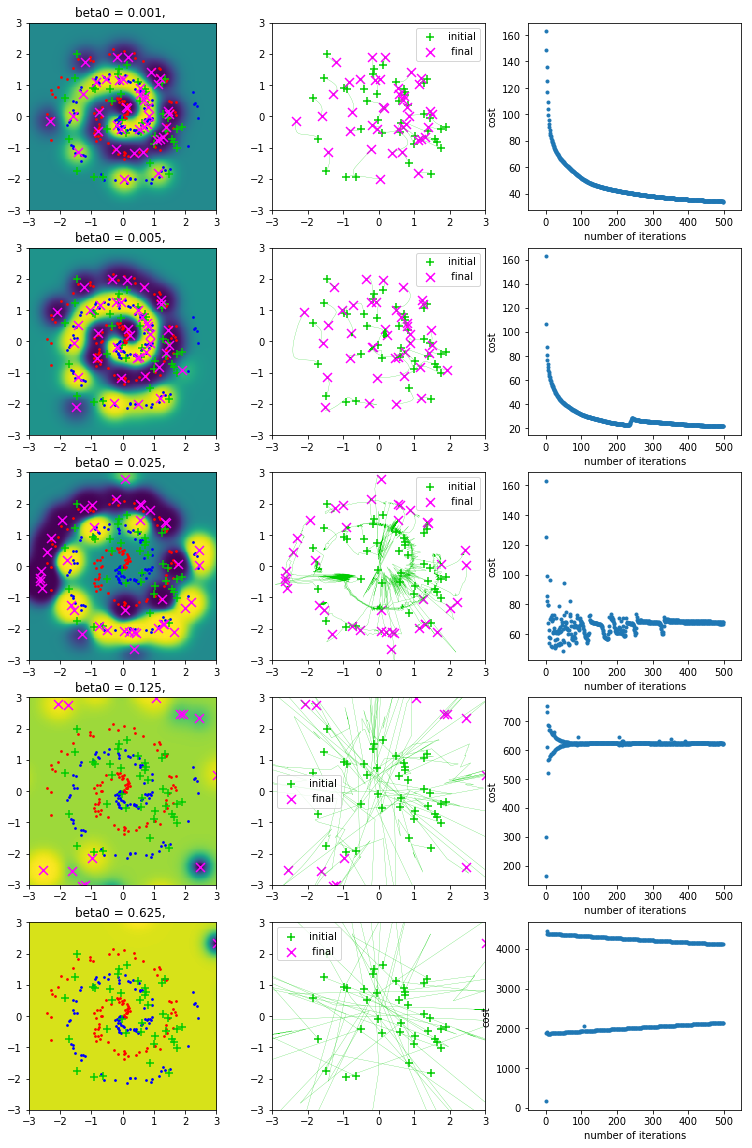

In [225]:
nstep = 500
sgps = 2000.0
lmd = 0.1
method = 'vanilla'
betas = [{'beta0': 0.001},
         {'beta0': 0.005},
         {'beta0': 0.025},
         {'beta0': 0.125},
         {'beta0': 0.625}]

plt.rcParams['figure.figsize'] = (13.0, len(betas) * 4.0)
for rep, beta in enumerate(betas):
    ax = 3 * rep + 1
    gd = GradientDescent(x, w, phi, alp, lmd, sgps, nstep, beta, method)
    theta, costs, alps = gd.optimization(phi, alp)
    gd.plot_output(len(betas), ax, ds, theta, costs, alps)

# Stochastic gradient descent

This is one of the simplest kind. Namely, given the gradient, updates are done exactly the opposite direction.

$$\begin{align}
direction \quad & = &\quad - gradient \\
learning\,rate \quad & = &\quad common\,to\,all\,the\,parameters\\
samples\,taken\,into\,account \quad & = &\quad all
\end{align}$$

The update form is as follows.
 
$$\begin{align}
\mathbf{\theta}_{t+1} \quad & = &\quad \mathbf{\theta}_{t} - \alpha \frac{\partial}{\partial \mathbf{\theta}}L\big(\{\mathbf{x}\}_{i=1}^{N}, \{w\}_{i=1}^{N}, \mathbf{\theta}\big)
\end{align}$$

Often, $\alpha$ is annealed as the step progresses. 

500 steps done. beta = 0.001, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.005, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.025, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.125, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.625, . lambda = 0.100. prior std**2 = 2000.00


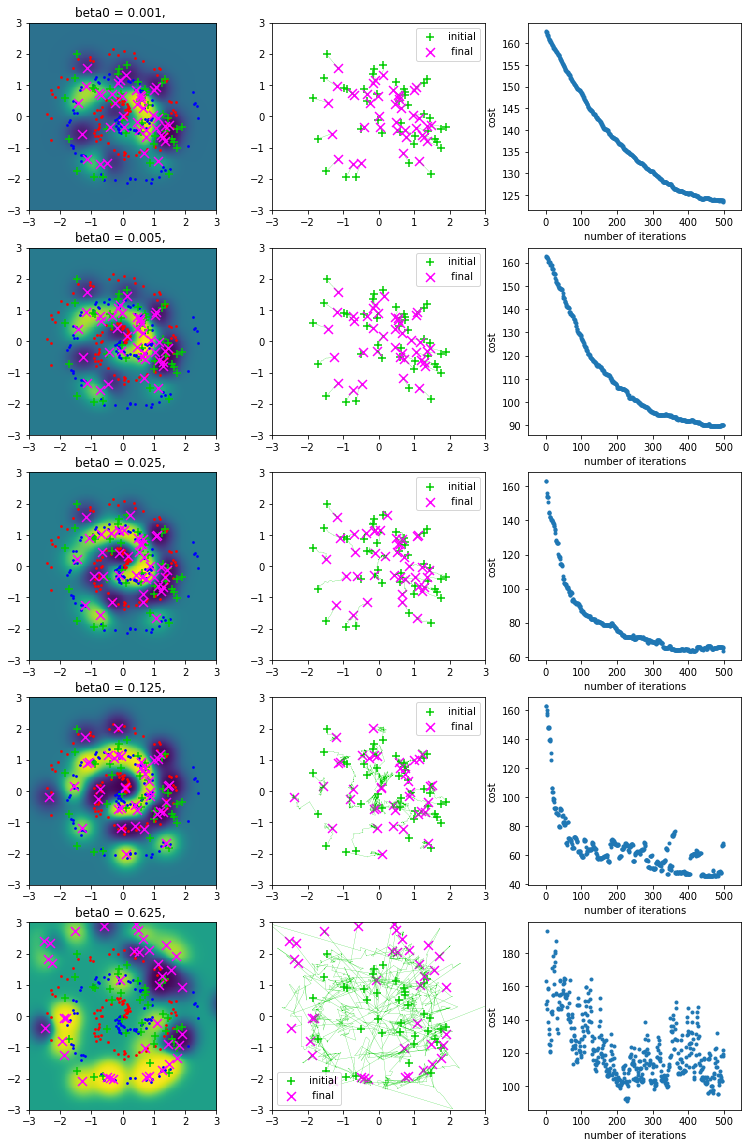

In [226]:
nstep = 500
sgps = 2000.0
lmd = 0.1
method = 'stochastic'
betas = [{'beta0': 0.001},
         {'beta0': 0.005},
         {'beta0': 0.025},
         {'beta0': 0.125},
         {'beta0': 0.625}]

plt.rcParams['figure.figsize'] = (13.0, len(betas) * 4.0)
for rep, beta in enumerate(betas):
    ax = 3 * rep + 1
    gd = GradientDescent(x, w, phi, alp, lmd, sgps, nstep, beta, method)
    theta, costs, alps = gd.optimization(phi, alp)
    gd.plot_output(len(betas), ax, ds, theta, costs, alps)

# Minibatch gradient descent

This is one of the simplest kind. Namely, given the gradient, updates are done exactly the opposite direction.

$$\begin{align}
direction \quad & = &\quad - gradient \\
learning\,rate \quad & = &\quad common\,to\,all\,the\,parameters\\
samples\,taken\,into\,account \quad & = &\quad all
\end{align}$$

The update form is as follows.
 
$$\begin{align}
\mathbf{\theta}_{t+1} \quad & = &\quad \mathbf{\theta}_{t} - \alpha \frac{\partial}{\partial \mathbf{\theta}}L\big(\{\mathbf{x}\}_{i=1}^{N}, \{w\}_{i=1}^{N}, \mathbf{\theta}\big)
\end{align}$$

Often, $\alpha$ is annealed as the step progresses. 

500 steps done. beta = 0.001, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.005, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.025, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.125, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.625, . lambda = 0.100. prior std**2 = 2000.00


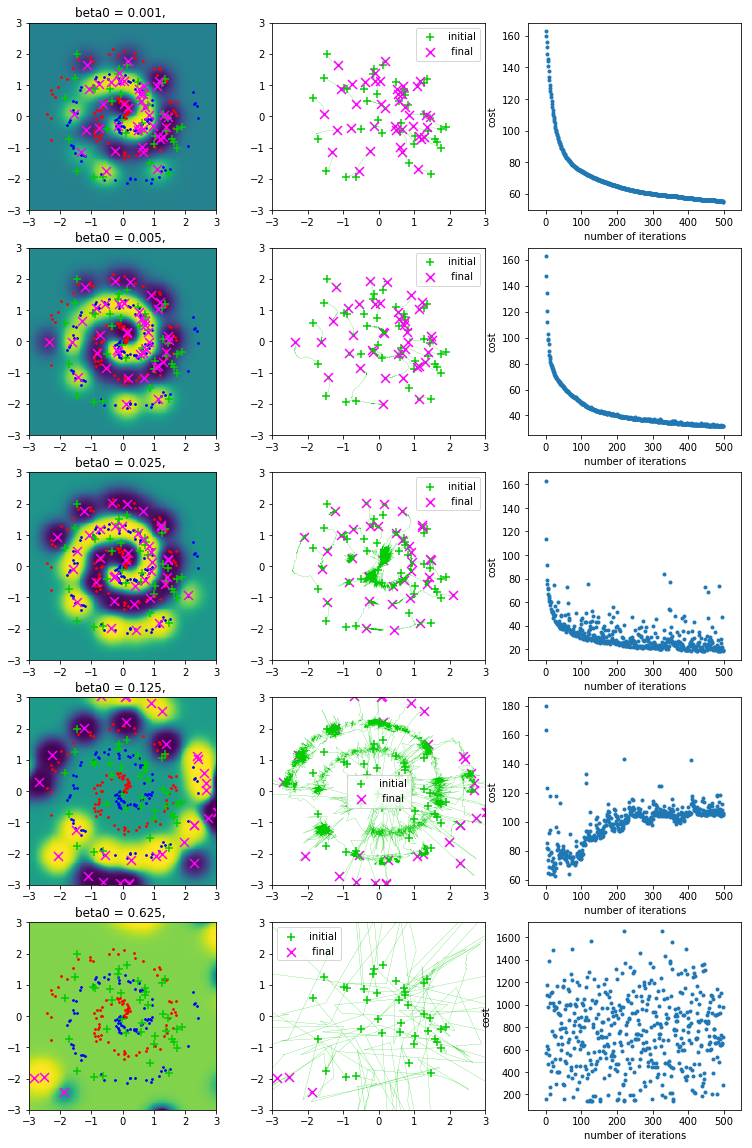

In [227]:
nstep = 500
sgps = 2000.0
lmd = 0.1
method = 'minibatch'
betas = [{'beta0': 0.001},
         {'beta0': 0.005},
         {'beta0': 0.025},
         {'beta0': 0.125},
         {'beta0': 0.625}]

plt.rcParams['figure.figsize'] = (13.0, len(betas) * 4.0)
for rep, beta in enumerate(betas):
    ax = 3 * rep + 1
    gd = GradientDescent(x, w, phi, alp, lmd, sgps, nstep, beta, method)
    theta, costs, alps = gd.optimization(phi, alp)
    gd.plot_output(len(betas), ax, ds, theta, costs, alps)

# Momentum

This is one of the simplest kind. Namely, given the gradient, updates are done exactly the opposite direction.

$$\begin{align}
direction \quad & = &\quad - gradient \\
learning\,rate \quad & = &\quad common\,to\,all\,the\,parameters\\
samples\,taken\,into\,account \quad & = &\quad all
\end{align}$$

The update form is as follows.
 
$$\begin{align}
\mathbf{\theta}_{t+1} \quad & = &\quad \mathbf{\theta}_{t} - \alpha \frac{\partial}{\partial \mathbf{\theta}}L\big(\{\mathbf{x}\}_{i=1}^{N}, \{w\}_{i=1}^{N}, \mathbf{\theta}\big)
\end{align}$$

Often, $\alpha$ is annealed as the step progresses. 

500 steps done. beta = 0.001, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.005, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.025, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.125, 0.950, . lambda = 0.100. prior std**2 = 2000.00


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


4 steps done. beta = 0.625, 0.950, . lambda = 0.100. prior std**2 = 2000.00


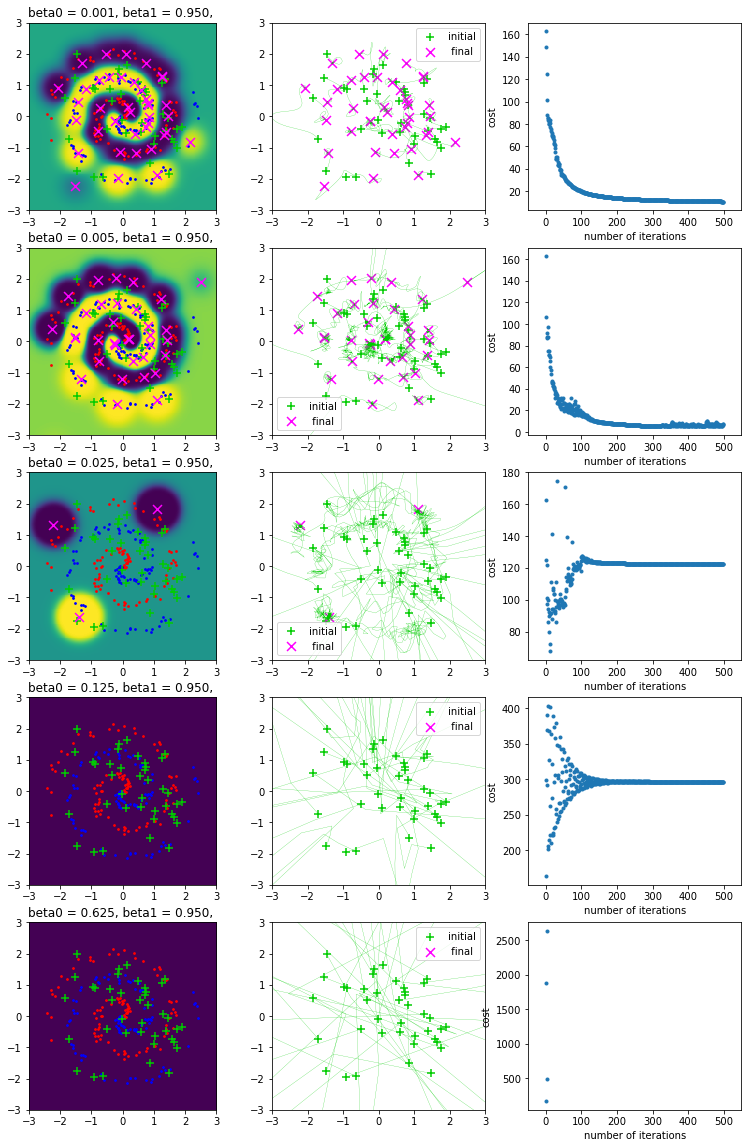

In [228]:
nstep = 500
sgps = 2000.0
lmd = 0.1
method = 'momentum'
betas = [{'beta0': 0.001, 'beta1': 0.95},
         {'beta0': 0.005, 'beta1': 0.95},
         {'beta0': 0.025, 'beta1': 0.95},
         {'beta0': 0.125, 'beta1': 0.95},
         {'beta0': 0.625, 'beta1': 0.95},]

plt.rcParams['figure.figsize'] = (13.0, len(betas) * 4.0)
for rep, beta in enumerate(betas):
    ax = 3 * rep + 1
    gd = GradientDescent(x, w, phi, alp, lmd, sgps, nstep, beta, method)
    theta, costs, alps = gd.optimization(phi, alp)
    gd.plot_output(len(betas), ax, ds, theta, costs, alps)

# Nesterov momentum

This is one of the simplest kind. Namely, given the gradient, updates are done exactly the opposite direction.

$$\begin{align}
direction \quad & = &\quad - gradient \\
learning\,rate \quad & = &\quad common\,to\,all\,the\,parameters\\
samples\,taken\,into\,account \quad & = &\quad all
\end{align}$$

The update form is as follows.
 
$$\begin{align}
\mathbf{\theta}_{t+1} \quad & = &\quad \mathbf{\theta}_{t} - \alpha \frac{\partial}{\partial \mathbf{\theta}}L\big(\{\mathbf{x}\}_{i=1}^{N}, \{w\}_{i=1}^{N}, \mathbf{\theta}\big)
\end{align}$$

Often, $\alpha$ is annealed as the step progresses. 

500 steps done. beta = 0.001, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.005, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.025, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.125, 0.950, . lambda = 0.100. prior std**2 = 2000.00


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


1 steps done. beta = 0.625, 0.950, . lambda = 0.100. prior std**2 = 2000.00


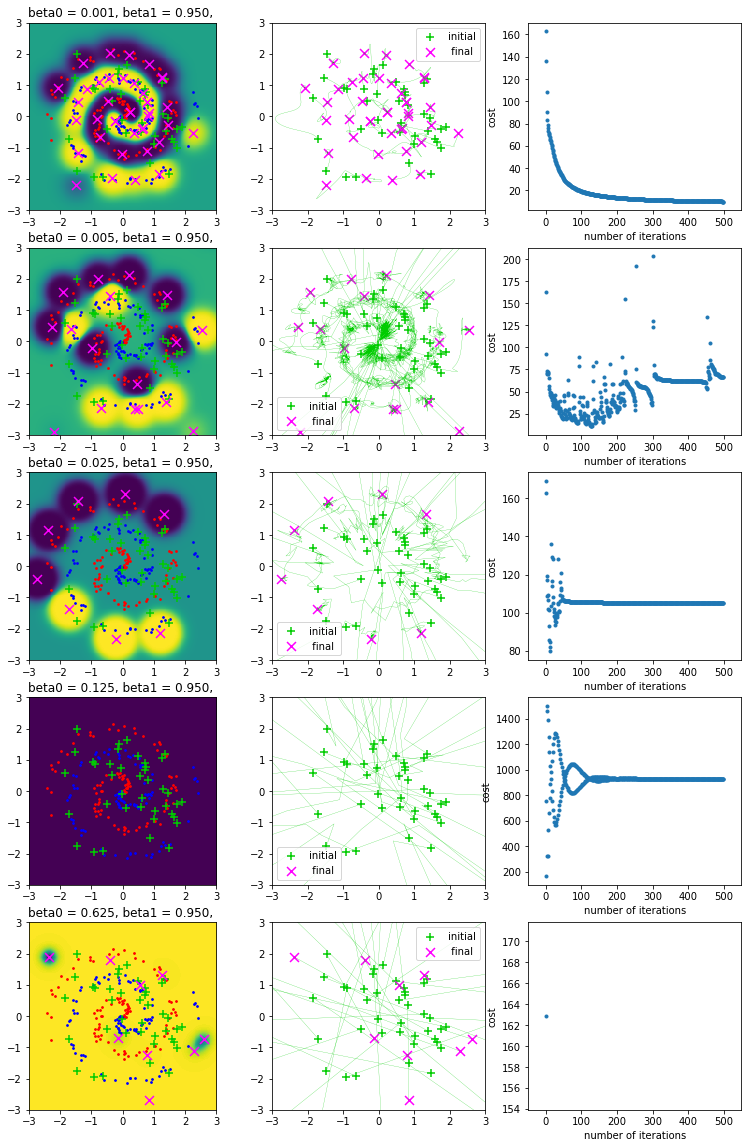

In [229]:
nstep = 500
sgps = 2000.0
lmd = 0.1
method = 'nesterov'
betas = [{'beta0': 0.001, 'beta1': 0.95},
         {'beta0': 0.005, 'beta1': 0.95},
         {'beta0': 0.025, 'beta1': 0.95},
         {'beta0': 0.125, 'beta1': 0.95},
         {'beta0': 0.625, 'beta1': 0.95},]

plt.rcParams['figure.figsize'] = (13.0, len(betas) * 4.0)
for rep, beta in enumerate(betas):
    ax = 3 * rep + 1
    gd = GradientDescent(x, w, phi, alp, lmd, sgps, nstep, beta, method)
    theta, costs, alps = gd.optimization(phi, alp)
    gd.plot_output(len(betas), ax, ds, theta, costs, alps)

# Adagrad

This is one of the simplest kind. Namely, given the gradient, updates are done exactly the opposite direction.

$$\begin{align}
direction \quad & = &\quad - gradient \\
learning\,rate \quad & = &\quad common\,to\,all\,the\,parameters\\
samples\,taken\,into\,account \quad & = &\quad all
\end{align}$$

The update form is as follows.
 
$$\begin{align}
\mathbf{\theta}_{t+1} \quad & = &\quad \mathbf{\theta}_{t} - \alpha \frac{\partial}{\partial \mathbf{\theta}}L\big(\{\mathbf{x}\}_{i=1}^{N}, \{w\}_{i=1}^{N}, \mathbf{\theta}\big)
\end{align}$$

Often, $\alpha$ is annealed as the step progresses. 

500 steps done. beta = 0.001, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.005, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.025, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.125, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.625, 0.950, . lambda = 0.100. prior std**2 = 2000.00


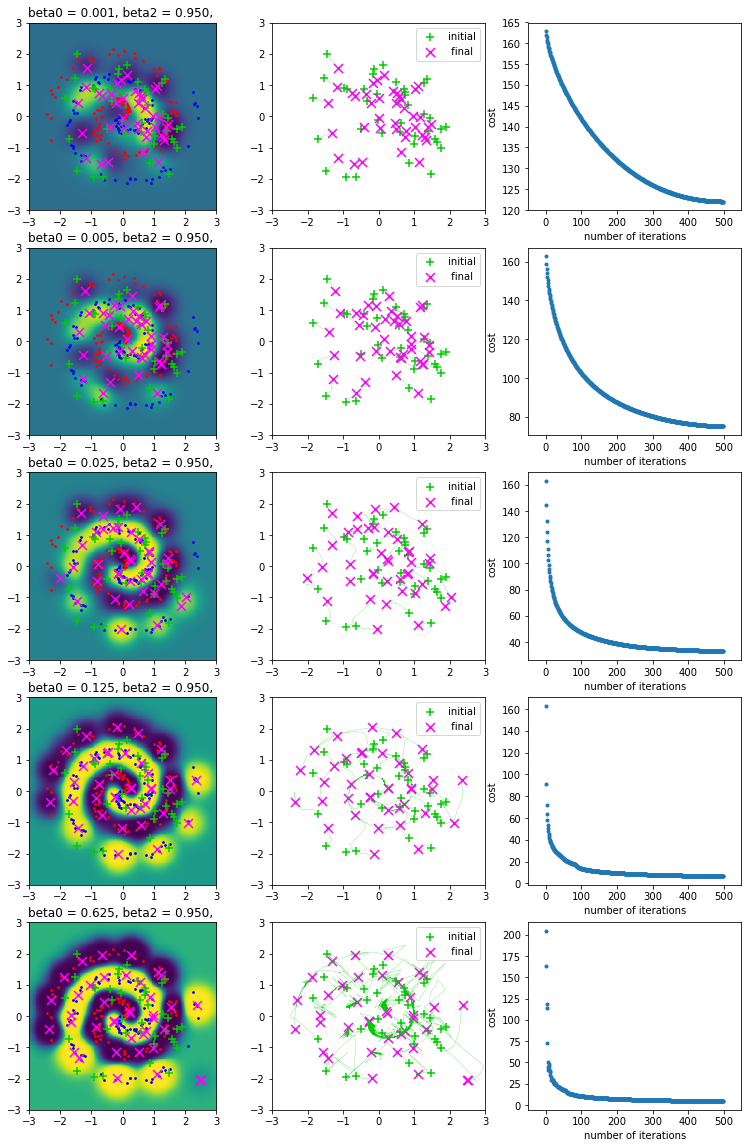

In [230]:
nstep = 500
sgps = 2000.0
lmd = 0.1
method = 'adagrad'
betas = [{'beta0': 0.001, 'beta2': 0.95},
         {'beta0': 0.005, 'beta2': 0.95},
         {'beta0': 0.025, 'beta2': 0.95},
         {'beta0': 0.125, 'beta2': 0.95},
         {'beta0': 0.625, 'beta2': 0.95},]

plt.rcParams['figure.figsize'] = (13.0, len(betas) * 4.0)
for rep, beta in enumerate(betas):
    ax = 3 * rep + 1
    gd = GradientDescent(x, w, phi, alp, lmd, sgps, nstep, beta, method)
    theta, costs, alps = gd.optimization(phi, alp)
    gd.plot_output(len(betas), ax, ds, theta, costs, alps)

# RMS prop

This is one of the simplest kind. Namely, given the gradient, updates are done exactly the opposite direction.

$$\begin{align}
direction \quad & = &\quad - gradient \\
learning\,rate \quad & = &\quad common\,to\,all\,the\,parameters\\
samples\,taken\,into\,account \quad & = &\quad all
\end{align}$$

The update form is as follows.
 
$$\begin{align}
\mathbf{\theta}_{t+1} \quad & = &\quad \mathbf{\theta}_{t} - \alpha \frac{\partial}{\partial \mathbf{\theta}}L\big(\{\mathbf{x}\}_{i=1}^{N}, \{w\}_{i=1}^{N}, \mathbf{\theta}\big)
\end{align}$$

Often, $\alpha$ is annealed as the step progresses. 

500 steps done. beta = 0.001, 0.950, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.005, 0.950, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.025, 0.950, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.125, 0.950, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.625, 0.950, 0.950, . lambda = 0.100. prior std**2 = 2000.00


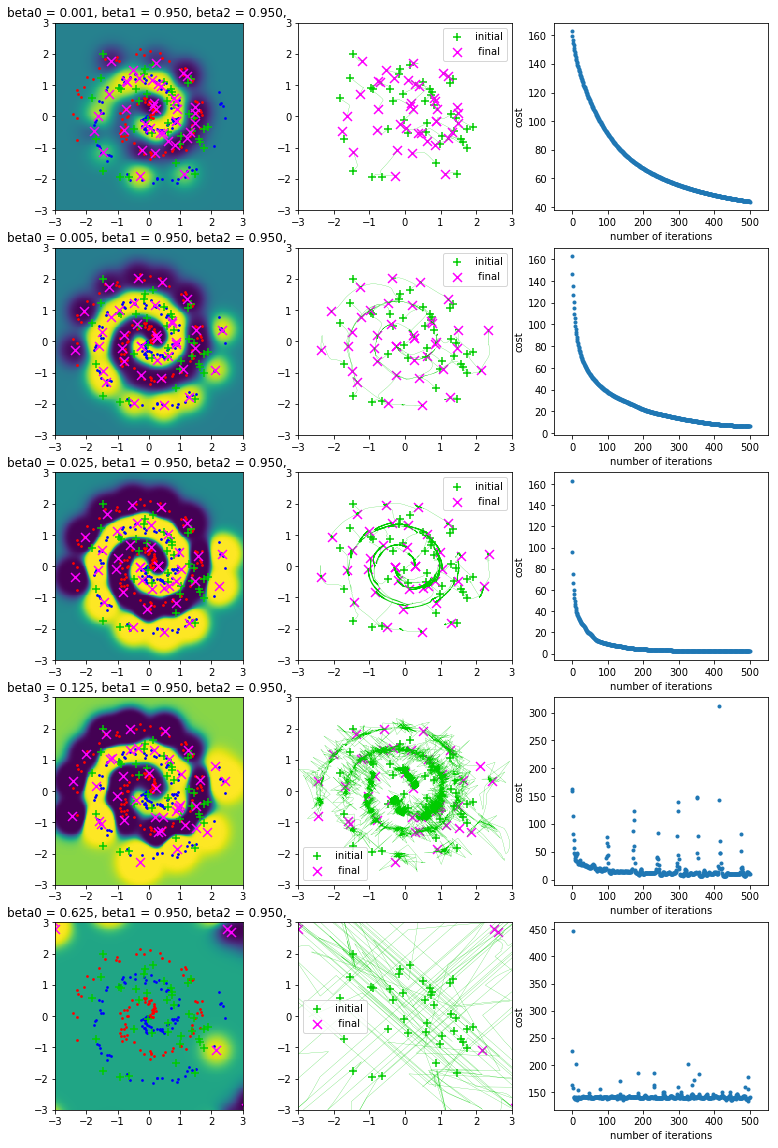

In [231]:
nstep = 500
sgps = 2000.0
lmd = 0.1
method = 'rmsprop'
betas = [{'beta0': 0.001, 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.005, 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.025, 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.125, 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.625, 'beta1': 0.95, 'beta2': 0.95},]

plt.rcParams['figure.figsize'] = (13.0, len(betas) * 4.0)
for rep, beta in enumerate(betas):
    ax = 3 * rep + 1
    gd = GradientDescent(x, w, phi, alp, lmd, sgps, nstep, beta, method)
    theta, costs, alps = gd.optimization(phi, alp)
    gd.plot_output(len(betas), ax, ds, theta, costs, alps)

# Adam

This is one of the simplest kind. Namely, given the gradient, updates are done exactly the opposite direction.

$$\begin{align}
direction \quad & = &\quad - gradient \\
learning\,rate \quad & = &\quad common\,to\,all\,the\,parameters\\
samples\,taken\,into\,account \quad & = &\quad all
\end{align}$$

The update form is as follows.
 
$$\begin{align}
\mathbf{\theta}_{t+1} \quad & = &\quad \mathbf{\theta}_{t} - \alpha \frac{\partial}{\partial \mathbf{\theta}}L\big(\{\mathbf{x}\}_{i=1}^{N}, \{w\}_{i=1}^{N}, \mathbf{\theta}\big)
\end{align}$$

Often, $\alpha$ is annealed as the step progresses. 

500 steps done. beta = 0.001, 0.950, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.005, 0.950, 0.950, . lambda = 0.100. prior std**2 = 2000.00
500 steps done. beta = 0.025, 0.950, 0.950, . lambda = 0.100. prior std**2 = 2000.00


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


359 steps done. beta = 0.125, 0.950, 0.950, . lambda = 0.100. prior std**2 = 2000.00
122 steps done. beta = 0.625, 0.950, 0.950, . lambda = 0.100. prior std**2 = 2000.00


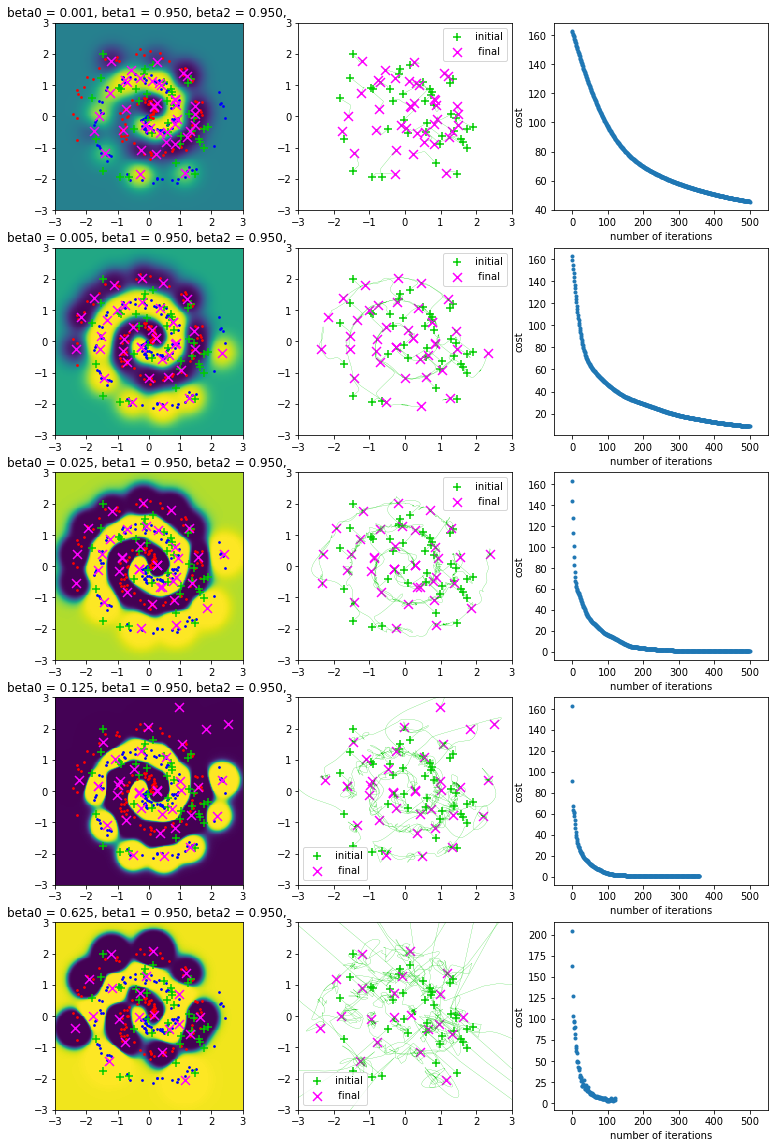

In [232]:
nstep = 500
sgps = 2000.0
lmd = 0.1
method = 'adam'
betas = [{'beta0': 0.001, 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.005, 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.025, 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.125, 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.625, 'beta1': 0.95, 'beta2': 0.95},]

plt.rcParams['figure.figsize'] = (13.0, len(betas) * 4.0)
for rep, beta in enumerate(betas):
    ax = 3 * rep + 1
    gd = GradientDescent(x, w, phi, alp, lmd, sgps, nstep, beta, method)
    theta, costs, alps = gd.optimization(phi, alp)
    gd.plot_output(len(betas), ax, ds, theta, costs, alps)

In [ ]:
nstep = 1000
sgps = 1000.0
lmd = 0.05
#method = 'vanilla'
#method = 'stochastic'
#method = 'minibatch'
#method = 'momentum'
#method = 'nesterov'
#method = 'adagrad'
#method = 'rmsprop'
#method = 'adam'
betas = [{'beta0': 0.002, 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.01 , 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.05 , 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.1  , 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.5  , 'beta1': 0.95, 'beta2': 0.95},]

plt.rcParams['figure.figsize'] = (13.0, len(betas) * 4.0)
for rep, beta in enumerate(betas):
    ax = 3 * rep + 1
    gd = GradientDescent(x, w, phi, alp, lmd, sgps, nstep, beta, method)
    theta, costs, alps = gd.optimization(phi, alp)
    gd.plot_output(len(betas), ax, ds, theta, costs, alps)

In [ ]:
nstep = 1000
sgps = 1000.0
lmd = 0.05
#method = 'vanilla'
#method = 'stochastic'
#method = 'minibatch'
#method = 'momentum'
#method = 'nesterov'
#method = 'adagrad'
#method = 'rmsprop'
#method = 'adam'
betas = [{'beta0': 0.002, 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.01 , 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.05 , 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.1  , 'beta1': 0.95, 'beta2': 0.95},
         {'beta0': 0.5  , 'beta1': 0.95, 'beta2': 0.95},]

plt.rcParams['figure.figsize'] = (13.0, len(betas) * 4.0)
for rep, beta in enumerate(betas):
    ax = 3 * rep + 1
    gd = GradientDescent(x, w, phi, alp, lmd, sgps, nstep, beta, method)
    theta, costs, alps = gd.optimization(phi, alp)
    gd.plot_output(len(betas), ax, ds, theta, costs, alps)

In [ ]:
def kaka(a, b, *args):
    print('a = ', a)
    print('b = ', b)
    for arg in args:
        print('c = ', arg)

In [ ]:
kaka(1, 2, 3, 4, 5, 6)

In [ ]:
def kaka(aa, bb, **kwargs):
    print('aa = ', aa)
    print('bb = ', bb)
    for key in kwargs:
        print('key = ', key, ', value = ', kwargs[key])

In [ ]:
kaka(1, 2, a=10, b=20, c=30)

In [ ]:
a = dict(a=10, b=20, c=30)
for k in a:
    print('key = ', k, ', value = ', a[k])

In [ ]:
a = 3
a